# Tyler's Potholes Data Set

In [5]:
import pandas as pd
import geopandas

data = pd.read_csv("potholes.csv",index_col = "CREATED_ON")
data.head(3)

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,,
2017-06-14T10:03:00,70915,161823.0,Rodent control,Call Center,1,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.943235,40.467422,APPROXIMATE
2017-08-11T08:03:00,48238,178453.0,Illegal Parking,Call Center,1,Police - Zones 1-6,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,-79.916473,40.430555,APPROXIMATE
2017-08-11T08:37:00,38897,178457.0,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT


In [2]:
only_pots = data['REQUEST_TYPE'] == 'Potholes';
only_pots.head()

CREATED_ON
2017-06-14T10:03:00    False
2017-08-11T08:03:00    False
2017-08-11T08:37:00     True
2017-08-11T08:45:00    False
2017-08-11T08:49:00    False
Name: REQUEST_TYPE, dtype: bool

In [3]:
pots = data[only_pots]
pots.head()

,_id,REQUEST_ID,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
CREATED_ON,,,,,,,,,,,,,,,,,
2017-08-11T08:37:00,38897,178457.0,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT
2017-08-11T09:05:00,57654,178468.0,Potholes,Call Center,1,DPW - Street Maintenance,Lincoln Place,5.0,31.0,4.200331e+10,3.0,31.0,4.0,4-20,-79.923985,40.379053,EXACT
2017-08-11T09:52:00,56233,178497.0,Potholes,Call Center,1,DPW - Street Maintenance,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.928738,40.482461,EXACT
2017-08-11T09:57:00,57324,178500.0,Potholes,Call Center,1,DPW - Street Maintenance,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.917332,40.475671,EXACT
2017-08-11T10:04:00,58191,178505.0,Potholes,Call Center,1,DPW - Street Maintenance,Larimer,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-12,-79.910853,40.468965,EXACT


In [30]:
grouped_pots = pots.groupby("NEIGHBORHOOD").count()
grouped_pots1 = grouped_pots['REQUEST_ID'].sort_values(ascending=True)
grouped_pots1 = grouped_pots1.to_frame()
grouped_pots1.head()

,REQUEST_ID
NEIGHBORHOOD,
Mount Oliver Borough,15
Arlington Heights,29
Glen Hazel,37
Chartiers City,56
St. Clair,73


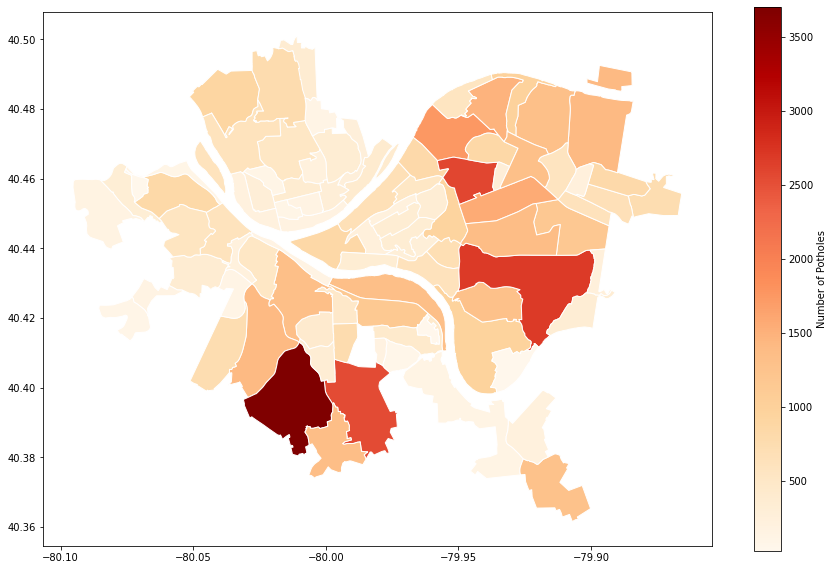

In [31]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
maps = hoods.merge(grouped_pots1, how='left', left_on='hood', right_on='NEIGHBORHOOD')
maps.plot(column='REQUEST_ID',
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Potholes"}, # label the legend
               figsize=(15, 10),         # set the size
               #missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
              )
